In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# pd.options.display.max_columns = None

# from IPython.core.pylabtools import figsize
# figsize(11, 9)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import rpy2.robjects as ro
from rpy2.robjects.packages import importr

In [180]:
base = importr('base')

# Make data

In [ ]:
N = 1000

## numericals

In [140]:
numerical_1 = np.random.uniform(0, 1, N)
numerical_2 = numerical_1 + 0.1*np.random.randn(N)

numerical_1_r = ro.FloatVector(numerical_1)
numerical_2_r = ro.FloatVector(numerical_2)

## categoricals

In [ ]:
def generate_rints(num_categories, N):
    rint_1 = np.random.randint(0, num_categories, N)
    rint_2 = rint_1.copy()
    
    for i in range(len(rint_1)):
        if np.random.uniform(0, 1)>0.9:
            rint_2[i]=np.random.randint(0, num_categories, 1)
    return rint_1, rint_2

### Binary

In [145]:
rint_binary_1, rint_binary_2 = generate_rints(2, N)

rint_binary_1_r = ro.IntVector(rint_binary_1)
rint_binary_2_r = ro.IntVector(rint_binary_2)
        
categorical_binary_1 = [str(i) for i in rint_binary_1]
categorical_binary_2 = [str(i) for i in rint_binary_2] 

categorical_binary_1_r = ro.FactorVector(categorical_binary_1)
categorical_binary_2_r = ro.FactorVector(categorical_binary_2)

### Multiple 

In [146]:
rint_multi_1, rint_multi_2 = generate_rints(5, N)

rint_multi_1_r = ro.IntVector(rint_multi_1)
rint_multi_2_r = ro.IntVector(rint_multi_2)
        
categorical_multi_1 = [str(i) for i in rint_multi_1]
categorical_multi_2 = [str(i) for i in rint_multi_1] 

categorical_multi_1_r = ro.FactorVector(categorical_multi_1)
categorical_multi_2_r = ro.FactorVector(categorical_multi_2)

## Correlated numerical and categorical

In [147]:
numerical_3 = np.array([np.random.normal(0, 1) if c==0 else np.random.normal(1, 1) for c in rint_binary_2])
numerical_3_r = ro.FloatVector(numerical_3)

In [147]:
numerical_3 = np.array([np.random.normal(0, 1) if c==0 else np.random.normal(1, 1) for c in rint_binary_2])
numerical_3_r = ro.FloatVector(numerical_3)

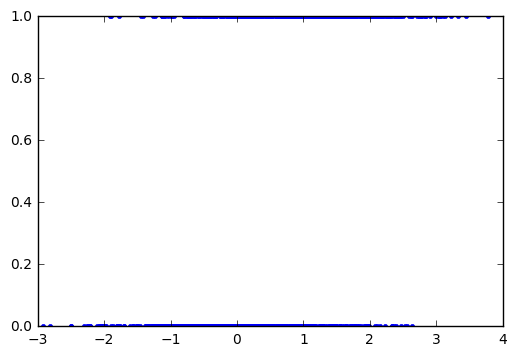

In [148]:
plt.plot(numerical_3, rint_binary_2, '.')

# numerical v.s. numerical

## Pearson correlation coefficient

In [186]:
scipy.stats.pearsonr(numerical_1, numerical_2)

(0.94110791971333241, 0.0)

In [190]:
print ro.r.cor(numerical_1_r, numerical_2_r)

[1] 0.9411079



# numerical v.s. categorical

## ttest

### Correlated

In [195]:
numerical_3_0 = numerical_3[np.where(rint_binary_2==0)]
numerical_3_1 = numerical_3[np.where(rint_binary_2==1)]
scipy.stats.ttest_ind(numerical_3_0, numerical_3_1, axis=0, equal_var=True)

Ttest_indResult(statistic=-15.290988894909965, pvalue=1.3974169307393314e-47)

In [220]:
numerical_3_0_r = ro.FloatVector(numerical_3_0)
numerical_3_1_r = ro.FloatVector(numerical_3_1)
tt = ro.r('t.test')(numerical_3_0_r, numerical_3_1_r)
print tt.names.r_repr()
print tt[tt.names.index('statistic')]

c("statistic", "parameter", "p.value", "conf.int", "estimate", 
"null.value", "alternative", "method", "data.name")
        t 
-15.29396 



In [222]:
a=1; b=2;
a
b

2

### Uncorrelated

In [161]:
scipy.stats.ttest_ind(numerical_2[np.where(rint_binary_2==0)], numerical_2[np.where(rint_binary_2==1)], axis=0, equal_var=True)

Ttest_indResult(statistic=0.53380829696972421, pvalue=0.59359304373185329)

In [151]:
scipy.stats.f_oneway(numerical_3[np.where(rint_binary_2==0)], numerical_3[np.where(rint_binary_2==1)])

F_onewayResult(statistic=233.81434138425982, pvalue=1.397416930739892e-47)

## Analysis of Variance

### Interesting case

In [179]:
df = ro.DataFrame({'num':numerical_3_r, 'cat': categorical_binary_2_r})
aov_res = ro.r('aov')(ro.Formula('num~cat'), df)
print base.summary(aov_res)

             Df Sum Sq Mean Sq F value Pr(>F)    
cat           1  240.1  240.13   233.8 <2e-16 ***
Residuals   998 1024.9    1.03                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



In [152]:
scipy.stats.f_oneway(numerical_2[np.where(rint_binary_2==0)], numerical_2[np.where(rint_binary_2==1)])

F_onewayResult(statistic=0.2849512979137182, pvalue=0.59359304373168742)

### Uninteresting case

In [183]:
df = ro.DataFrame({'num':numerical_2_r, 'cat': categorical_binary_2_r})
aov_res = ro.r('aov')(ro.Formula('num~cat'), df)
print base.summary(aov_res)

             Df Sum Sq Mean Sq F value Pr(>F)
cat           1   0.03 0.02648   0.285  0.594
Residuals   998  92.76 0.09294               



In [182]:
print base.summary(ro.r('chisq.test')(categorical_binary_1_r, categorical_binary_2_r))

          Length Class  Mode     
statistic 1      -none- numeric  
parameter 1      -none- numeric  
p.value   1      -none- numeric  
method    1      -none- character
data.name 1      -none- character
observed  4      table  numeric  
expected  4      -none- numeric  
residuals 4      table  numeric  
stdres    4      table  numeric  



Ref: http://stats.stackexchange.com/questions/108007/correlations-with-categorical-variables